In [1]:
%pip install discopula

> Make sure to have discopula's latest version installed using `pip`. More information about the latest version can be found at https://pypi.org/project/discopula/

In [2]:
import numpy as np
from discopula import (
    bootstrap_ccram,
    permutation_test_ccram,
    bootstrap_predict_category_summary,
    display_prediction_summary
)

### Create Sample Contingency Table

In [3]:
contingency_table = np.array([
    [0, 0, 20],
    [0, 10, 0],
    [20, 0, 0],
    [0, 10, 0],
    [0, 0, 20]
])

### Bootstrapping CCRAM & SCCRAM Metrics

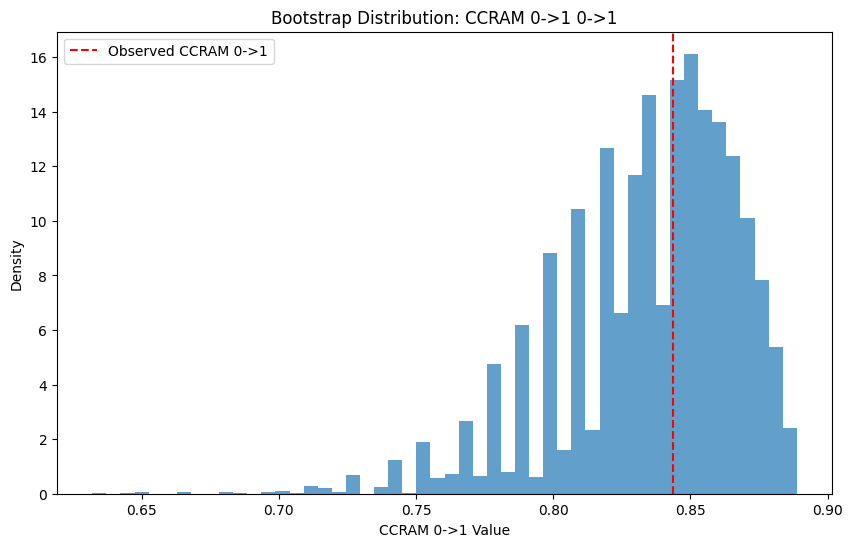

In [4]:
ccram_result = bootstrap_ccram(
    contingency_table,
    from_axis=0,
    to_axis=1,
    n_resamples=9999
)

In [5]:
print(f"Metric Name: {ccram_result.metric_name}")
print(f"Observed Value: {ccram_result.observed_value:.4f}")
print(f"95% CI: ({ccram_result.confidence_interval[0]:.4f}, {ccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {ccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(ccram_result.bootstrap_distribution)}")

Metric Name: CCRAM 0->1
Observed Value: 0.8438
95% CI: (0.7553, 0.8809)
Standard Error: 0.0325
Bootstrap Distribution: <class 'numpy.ndarray'>


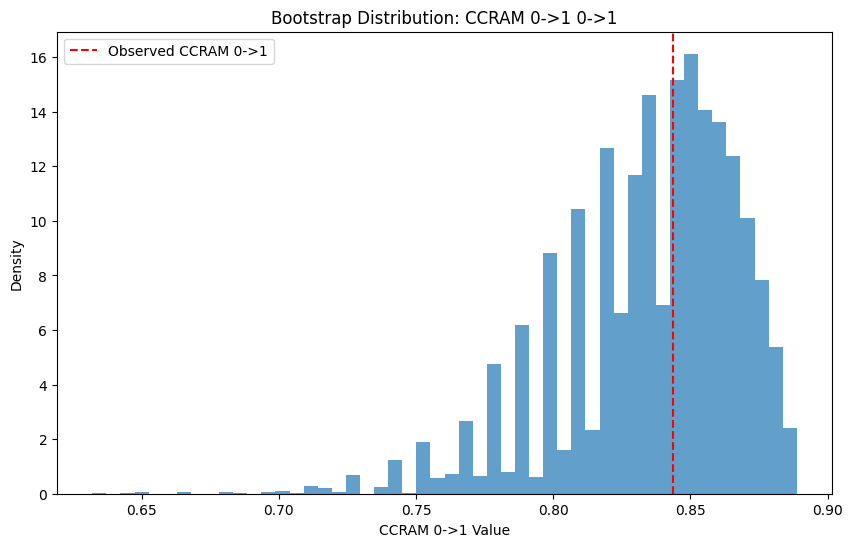

In [7]:
ccram_result.histogram_fig

### Bootstrap Prediction of Categories through Checkerboard Copula Regression

In [9]:
prediction_matrix = bootstrap_predict_category_summary(
    contingency_table,
    from_axis=0,
    to_axis=1,
    n_resamples=9999
)
print("\nPrediction Matrix:")
print(prediction_matrix)


Prediction Matrix:
[[0.00000000e+00 0.00000000e+00 1.00000000e+02 1.00010001e-02
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+02 0.00000000e+00 9.99899990e+01
  0.00000000e+00]
 [1.00000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+02]]


In [10]:
display_prediction_summary(
    prediction_matrix,
    from_axis_name="X1",
    to_axis_name="X2"
)


Prediction Summary (% of bootstrap samples)
From X1 to X2:
--------------------------------------------------
       X1=0   X1=1   X1=2   X1=3   X1=4
X2=0   0.0%   0.0% 100.0%   0.0%   0.0%
X2=1   0.0% 100.0%   0.0% 100.0%   0.0%
X2=2 100.0%   0.0%   0.0%   0.0% 100.0%
--------------------------------------------------


### Permutation Testing for CCRAM & SCCRAM Metrics

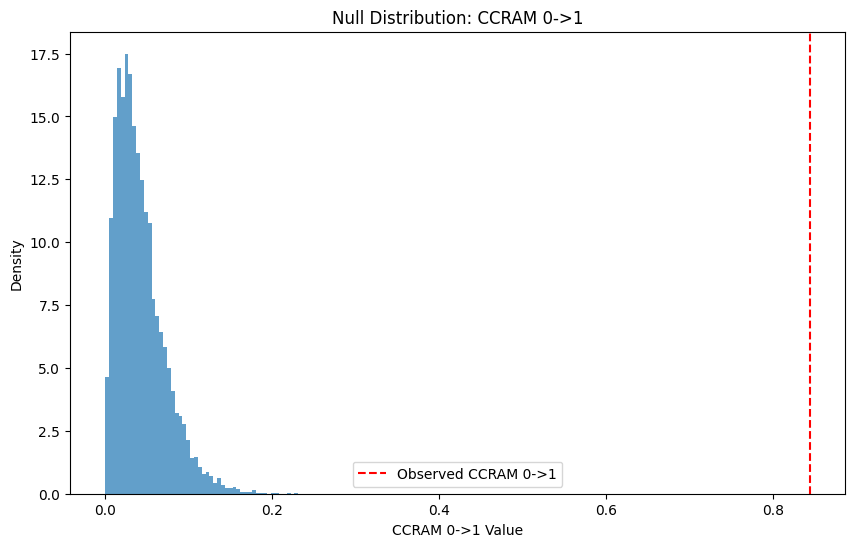

In [11]:
perm_result = permutation_test_ccram(
    contingency_table,
    from_axis=0,
    to_axis=1,
    alternative='greater',
    n_resamples=9999
)

In [12]:
print(f"Metric Name: {perm_result.metric_name}")
print(f"Observed Value: {perm_result.observed_value:.4f}")
print(f"P-Value: {perm_result.p_value:.4f}")
print(f"Null Distribution: {type(perm_result.null_distribution)}")

Metric Name: CCRAM 0->1
Observed Value: 0.8438
P-Value: 0.0001
Null Distribution: <class 'numpy.ndarray'>


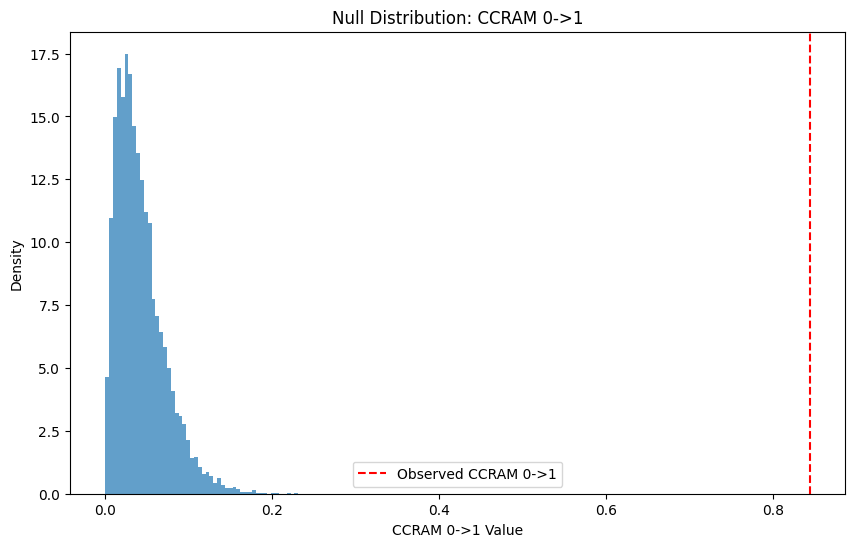

In [13]:
perm_result.histogram_fig